In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# !pip install scipy ruptures
import ruptures as rpt

from scipy.stats import linregress
from scipy.stats import mannwhitneyu
# !pip install pymannkendall
# from pymannkendall import original_test

# NO

In [2]:

def preprocess_data(df):
    # 去掉负数值和大于140 or 65 的异常值
    df = df[(df['NO_weighted_value(ug m-3)'] >= 0) & (df['NO_weighted_value(ug m-3)'] <= 70)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\NO_weighted"
# base_folder = r"C:\Users\ucfnxch\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\NO_weighted"
# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-NO_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-NO_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-NO_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-NO_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-NO_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-NO_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-NO_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'NO_weighted_value(ug m-3)']]])
    summary_stats[name] = df['NO_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
# print(summary_stats_df)


            Camden  City of London    Islington  Kensington and Chelsea  \
count  2392.000000     2134.000000  2387.000000             2384.000000   
mean      7.520547       20.065943     4.781296                4.290977   
std       8.634217       17.336727     8.100596                7.888905   
min       0.400000        0.100000    -0.000000                0.000000   
25%       2.300000        5.200000     1.400000                0.900000   
50%       4.500000       15.450000     2.200000                1.700000   
75%       9.187500       29.900000     4.200000                3.600000   
max      69.800000       69.900000    69.500000               69.900000   

           Lambeth    Southwark  Westminster  
count  2319.000000  2320.000000  2321.000000  
mean     20.882760    17.027085    30.610886  
std      13.055499    15.125344    12.609106  
min       1.900000     0.000000     1.600000  
25%      11.400000     4.400000    21.766667  
50%      17.800000    13.100000    29.4500

### hist & boxplot

In [3]:
"""
# 可视化数据分布
plt.figure(figsize=(20, 15))

# # 直方图
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    sns.histplot(df['NO_weighted_value(ug m-3)'], kde=True)
    plt.title(f'Histogram of Nitrix Oxide(NO) Weighted Values - {name}', fontsize=20)
    plt.ylabel('Frequency', fontsize=16)
    if i == len(datasets):  # Only set x-label for the last subplot
        plt.xlabel('NO Weighted Value (ug/m3)', fontsize=16)
    else:
        plt.xlabel('')  # Hide x-label for other subplots
plt.tight_layout()
plt.show()

"""

"\n# 可视化数据分布\nplt.figure(figsize=(20, 15))\n\n# # 直方图\nfor i, (name, df) in enumerate(datasets.items(), 1):\n    plt.subplot(7, 1, i)\n    sns.histplot(df['NO_weighted_value(ug m-3)'], kde=True)\n    plt.title(f'Histogram of Nitrix Oxide(NO) Weighted Values - {name}', fontsize=20)\n    plt.ylabel('Frequency', fontsize=16)\n    if i == len(datasets):  # Only set x-label for the last subplot\n        plt.xlabel('NO Weighted Value (ug/m3)', fontsize=16)\n    else:\n        plt.xlabel('')  # Hide x-label for other subplots\nplt.tight_layout()\nplt.show()\n\n"

In [4]:
"""
# 可视化数据分布
plt.figure(figsize=(15, 8))
# 箱线图
plt.subplot(2, 1, 2)
sns.boxplot(x='Region', y='NO_weighted_value(ug m-3)', data=combined_df, palette="Set2")
plt.title('Boxplot of Nitrix Oxide(NO) Weighted Values')
plt.xlabel('Study Area', fontsize=12)
plt.ylabel('NO Weighted Value (ug/m3)')

# plt.subplot(2, 1, 2)
# sns.boxplot(data=[df['NO_weighted_value(ug m-3)'] for df in datasets.values()], palette="Set2")
# plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())
# plt.title('Boxplot of NO Weighted Values')
# plt.xlabel('Study Area')
# plt.ylabel('NO Weighted Value (ug/m3)')

# plt.tight_layout()
# plt.show()
# """

'\n# 可视化数据分布\nplt.figure(figsize=(15, 8))\n# 箱线图\nplt.subplot(2, 1, 2)\nsns.boxplot(x=\'Region\', y=\'NO_weighted_value(ug m-3)\', data=combined_df, palette="Set2")\nplt.title(\'Boxplot of Nitrix Oxide(NO) Weighted Values\')\nplt.xlabel(\'Study Area\', fontsize=12)\nplt.ylabel(\'NO Weighted Value (ug/m3)\')\n\n# plt.subplot(2, 1, 2)\n# sns.boxplot(data=[df[\'NO_weighted_value(ug m-3)\'] for df in datasets.values()], palette="Set2")\n# plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())\n# plt.title(\'Boxplot of NO Weighted Values\')\n# plt.xlabel(\'Study Area\')\n# plt.ylabel(\'NO Weighted Value (ug/m3)\')\n\n# plt.tight_layout()\n# plt.show()\n# '

## Time Series Analysis

### ULEZs

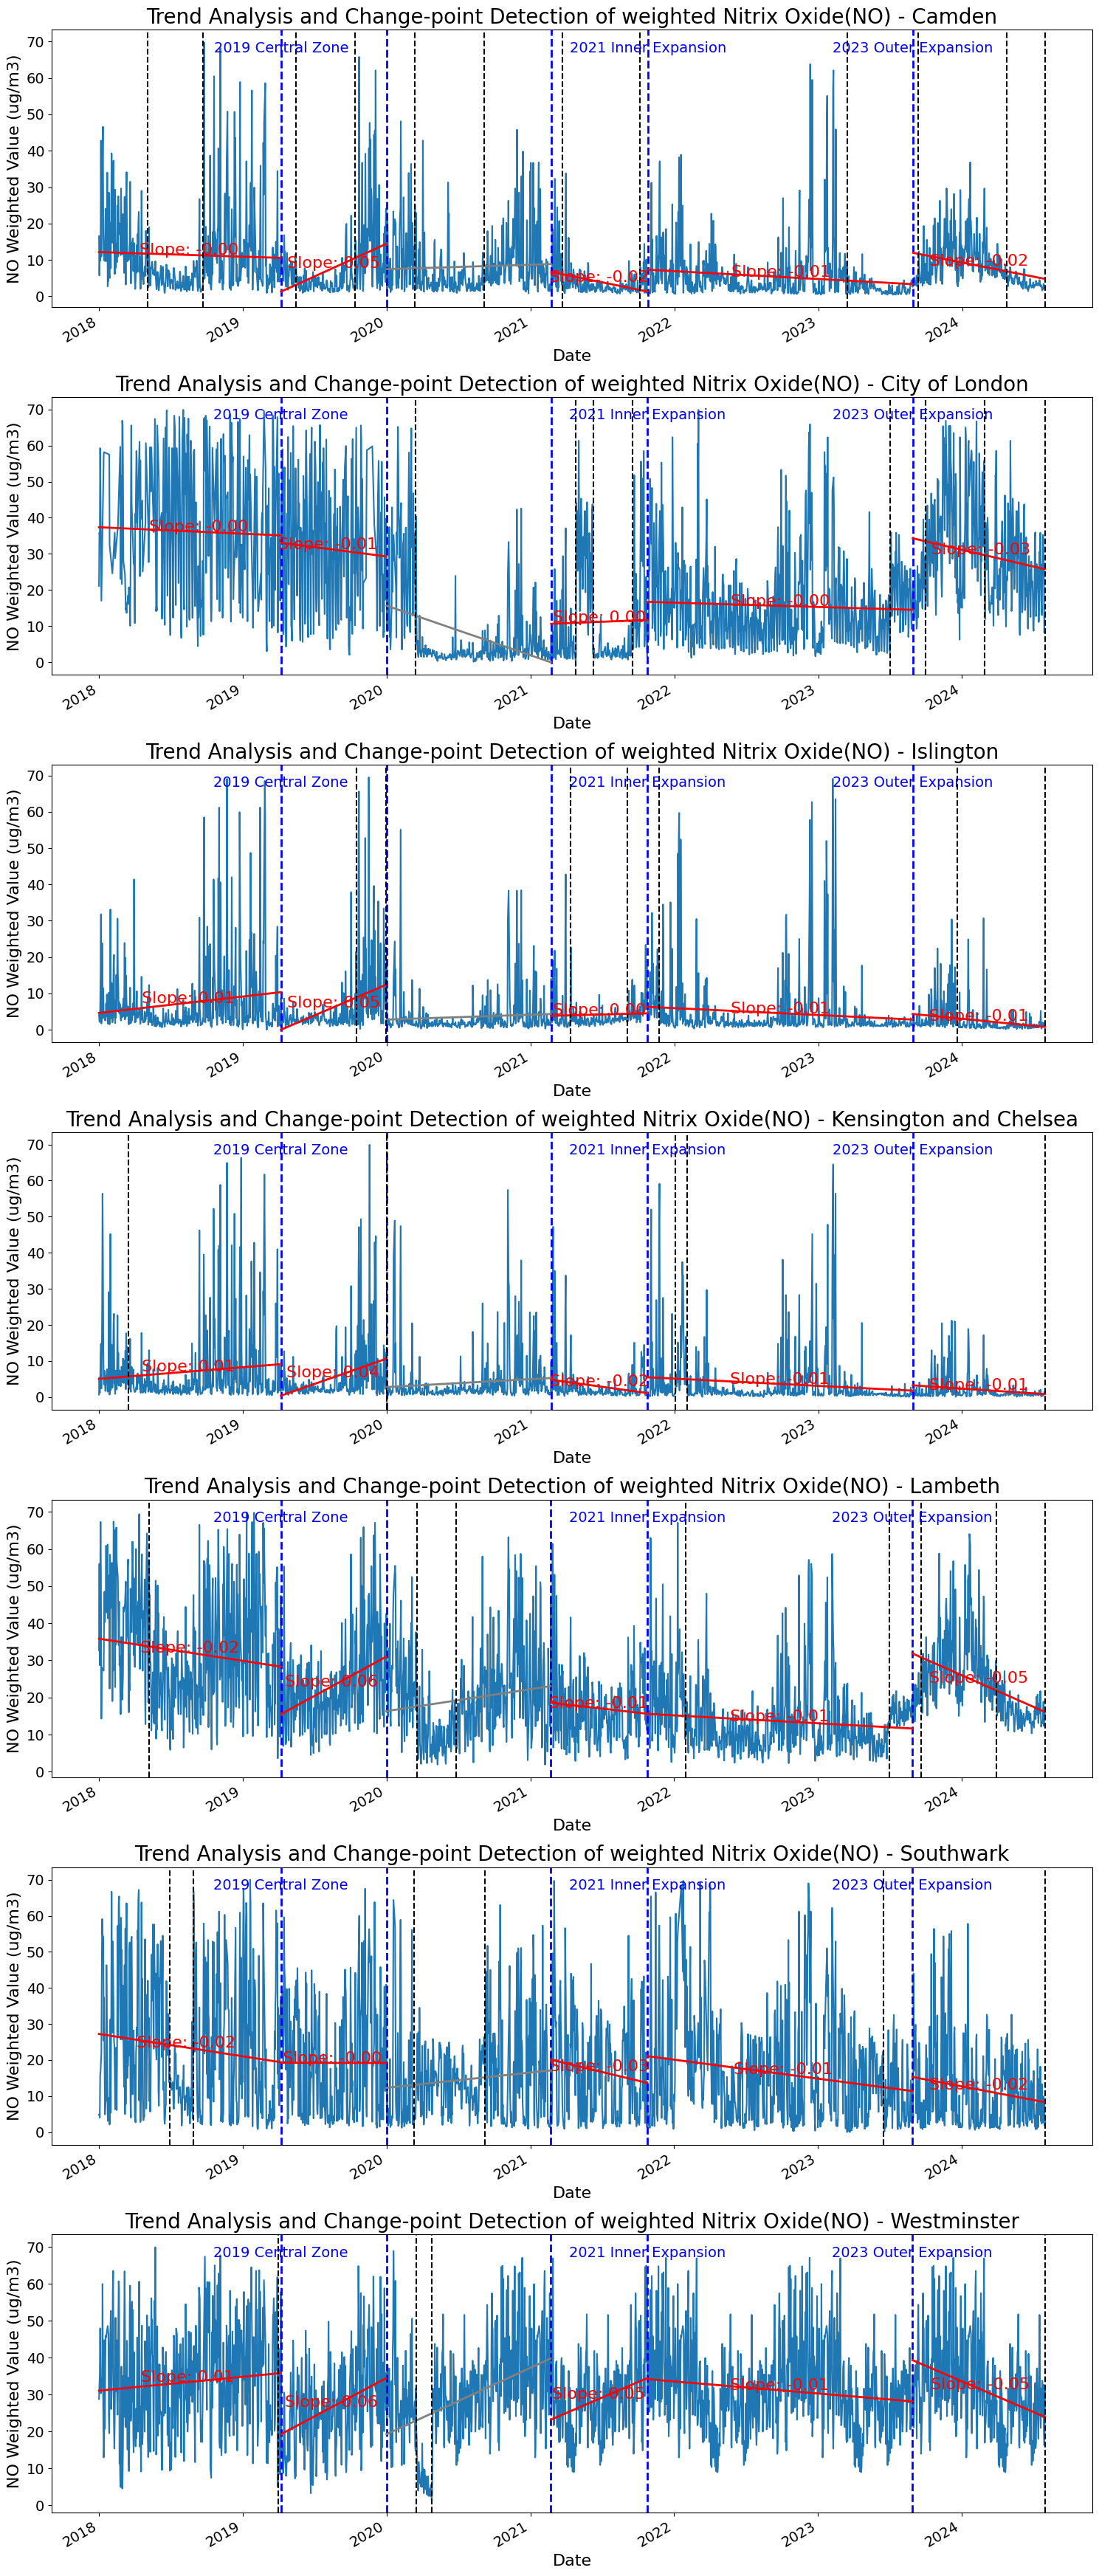

In [5]:
# Define ULEZ change dates
ulez_changes = {
    "2019 Central Zone": pd.to_datetime("2019-04-08"),
    "2020 Covid-19 Lockdown": pd.to_datetime("2020-01-01"),
    "2021 Lockdown release": pd.to_datetime("2021-02-22"),
    "2021 Inner Expansion": pd.to_datetime("2021-10-25"),
    "2023 Outer Expansion": pd.to_datetime("2023-08-29")
}

highlight_changes = ["2019 Central Zone", "2021 Inner Expansion", "2023 Outer Expansion"]

# Prepare figure
plt.figure(figsize=(15, 35))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    
    # Plot NO weighted values
    df['NO_weighted_value(ug m-3)'].plot(label=name)

    # Plot ULEZ change dates as vertical dashed lines and add labels inside the plot
    for change_name, change_date in ulez_changes.items():
        plt.axvline(change_date, color='blue', linestyle='--', linewidth=2, label=f'ULEZ {change_name}')
        if change_name in highlight_changes:
            plt.text(change_date, df['NO_weighted_value(ug m-3)'].max() * 0.95, change_name, color='blue', fontsize=14, ha='center', va='bottom')
        

    # Trend analysis with linear regression and annotations
    for period_start, period_end in zip([df.index.min()] + list(ulez_changes.values()), list(ulez_changes.values()) + [df.index.max()]):
        period_mask = (df.index >= period_start) & (df.index < period_end)
        period_data = df.loc[period_mask, 'NO_weighted_value(ug m-3)']
        
        if len(period_data) > 1:  # Ensure there are enough points for regression
            slope, intercept, r_value, p_value, std_err = linregress(period_data.index.map(pd.Timestamp.toordinal), period_data)
            if period_start == pd.to_datetime("2020-01-01") and period_end == pd.to_datetime("2021-02-22"):
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='gray', linestyle='-', linewidth=2)
            else:
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='red', linestyle='-', linewidth=2)
                plt.text(period_data.index[len(period_data)//2], intercept + slope * period_data.index[len(period_data)//2].toordinal(), 
                        f"Slope: {slope:.2f}", color='red', fontsize=16, ha='center')

    # Change point detection using ruptures
    algo = rpt.Pelt(model="rbf").fit(df['NO_weighted_value(ug m-3)'].values)
    result = algo.predict(pen=10)
    
    # Highlight change points
    for cp in result:
        plt.axvline(df.index[cp - 1], color='k', linestyle='--')
    
    # Set larger font sizes for axis labels and legend
    plt.title(f'Trend Analysis and Change-point Detection of weighted Nitrix Oxide(NO) - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('NO Weighted Value (ug/m3)', fontsize=16)
    
    # Increase the size of axis ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


### Plot

In [ ]:
# uk_annual_mean = 40
# who_daily_mean = 25
# who_annual_mean = 10

# plt.figure(figsize=(15, 50))

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df.set_index('Date', inplace=True)
#     df['NO_weighted_value(ug m-3)'].plot(label=name)

#     # Add the three standard lines with text annotations
#     plt.axhline(y=uk_annual_mean, color='orange', linestyle='--', linewidth=2)
#     plt.text(df.index[0], uk_annual_mean, f'UK NO2 Annual Mean Objective ({uk_annual_mean} µg/m³)', color='orange', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_daily_mean, color='pink', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_daily_mean, f'WHO NO2 Daily Mean Guideline ({who_daily_mean} µg/m³)', color='pink', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_annual_mean, color='blue', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_annual_mean, f'WHO NO2 Annual Mean Guideline ({who_annual_mean} µg/m³)', color='blue', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.title(f'Time Series of Nitrix Oxide(NO) Weighted Values - {name}', fontsize=20)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('NO Weighted Value (ug/m³)', fontsize=16)

# plt.tight_layout()
# plt.show()

In [ ]:
# # 绘制时间序列图
# plt.figure(figsize=(15, 50))

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df.set_index('Date', inplace=True)
#     df['NO_weighted_value(ug m-3)'].plot(label=name)

#     plt.legend()
#     plt.title(f'Time Series of Nitrix Oxide(NO) Weighted Values - {name}', fontsize=20)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('NO Weighted Value (ug/m3)', fontsize=16)

# plt.tight_layout()
# plt.show()


# NO2

In [7]:

def preprocess_data(df):
    # 去掉负数值和大于140 or 65 的异常值
    df = df[(df['NO2_weighted_value(ug m-3)'] >= 0) & (df['NO2_weighted_value(ug m-3)'] <= 120)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\NO2_weighted"

# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-NO2_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-NO2_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-NO2_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-NO2_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-NO2_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-NO2_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-NO2_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'NO2_weighted_value(ug m-3)']]])
    summary_stats[name] = df['NO2_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
# print(summary_stats_df)


### hist & boxplot

In [ ]:

# # 可视化数据分布
# plt.figure(figsize=(20, 15))

# # # 直方图
# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     sns.histplot(df['NO2_weighted_value(ug m-3)'], kde=True)
#     plt.title(f'Histogram of Nitrogen Dioxide(NO2) Weighted Values - {name}', fontsize=20)
#     plt.ylabel('Frequency', fontsize=16)
#     if i == len(datasets):  # Only set x-label for the last subplot
#         plt.xlabel('NO2 Weighted Value (ug/m3)', fontsize=16)
#     else:
#         plt.xlabel('')  # Hide x-label for other subplots
# plt.tight_layout()
# plt.show()


In [ ]:
# # 可视化数据分布
# plt.figure(figsize=(15, 8))
# # 箱线图
# plt.subplot(2, 1, 2)
# sns.boxplot(x='Region', y='NO2_weighted_value(ug m-3)', data=combined_df, palette="Set2")
# plt.title('Boxplot of Nitrogen Dioxide(NO2) Weighted Values')
# plt.xlabel('Study Area', fontsize=12)
# plt.ylabel('NO2 Weighted Value (ug/m3)')


## Time Series Analysis

#### ULEZ

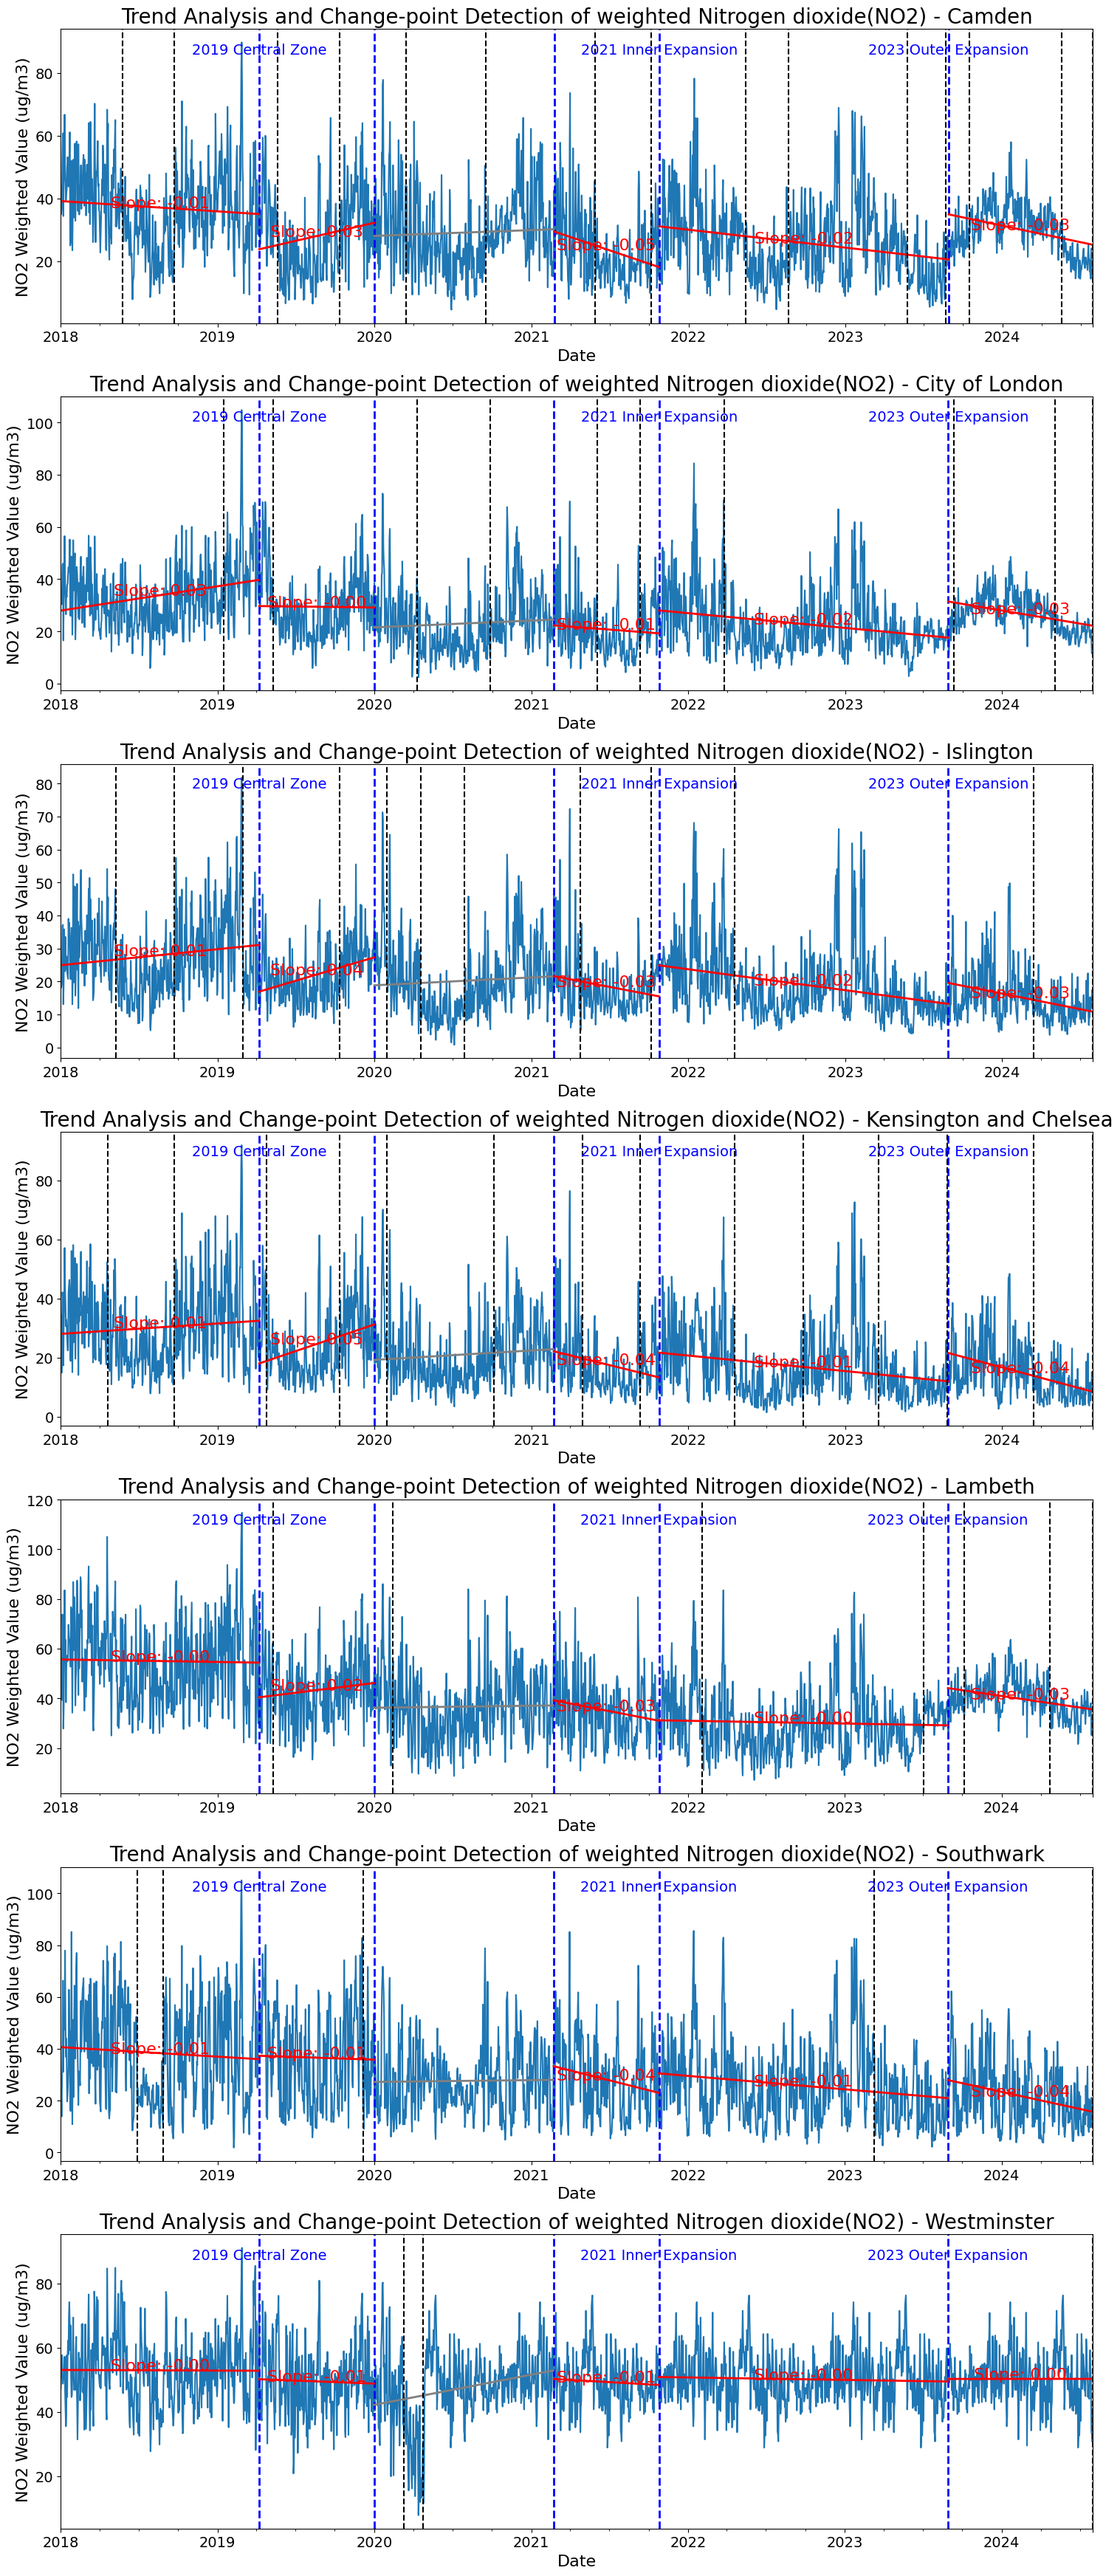

In [8]:
# Define ULEZ change dates
ulez_changes = {
    "2019 Central Zone": pd.to_datetime("2019-04-08"),
    "2020 Covid-19 Lockdown": pd.to_datetime("2020-01-01"),
    "2021 Lockdown release": pd.to_datetime("2021-02-22"),
    "2021 Inner Expansion": pd.to_datetime("2021-10-25"),
    "2023 Outer Expansion": pd.to_datetime("2023-08-29")
}

highlight_changes = ["2019 Central Zone", "2021 Inner Expansion", "2023 Outer Expansion"]

# Prepare figure
plt.figure(figsize=(15, 35))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    
    # Plot NO weighted values
    df['NO2_weighted_value(ug m-3)'].plot(label=name)

    # Plot ULEZ change dates as vertical dashed lines and add labels inside the plot
    for change_name, change_date in ulez_changes.items():
        plt.axvline(change_date, color='blue', linestyle='--', linewidth=2, label=f'ULEZ {change_name}')
        if change_name in highlight_changes:
            plt.text(change_date, df['NO2_weighted_value(ug m-3)'].max() * 0.95, change_name, color='blue', fontsize=14, ha='center', va='bottom')
        

    # Trend analysis with linear regression and annotations
    for period_start, period_end in zip([df.index.min()] + list(ulez_changes.values()), list(ulez_changes.values()) + [df.index.max()]):
        period_mask = (df.index >= period_start) & (df.index < period_end)
        period_data = df.loc[period_mask, 'NO2_weighted_value(ug m-3)']
        
        if len(period_data) > 1:  # Ensure there are enough points for regression
            slope, intercept, r_value, p_value, std_err = linregress(period_data.index.map(pd.Timestamp.toordinal), period_data)
            if period_start == pd.to_datetime("2020-01-01") and period_end == pd.to_datetime("2021-02-22"):
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='gray', linestyle='-', linewidth=2)
            else:
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='red', linestyle='-', linewidth=2)
                plt.text(period_data.index[len(period_data)//2], intercept + slope * period_data.index[len(period_data)//2].toordinal(), 
                        f"Slope: {slope:.2f}", color='red', fontsize=16, ha='center')

    # Change point detection using ruptures
    algo = rpt.Pelt(model="rbf").fit(df['NO2_weighted_value(ug m-3)'].values)
    result = algo.predict(pen=10)
    
    # Highlight change points
    for cp in result:
        plt.axvline(df.index[cp - 1], color='k', linestyle='--')
    
    # Set larger font sizes for axis labels and legend
    plt.title(f'Trend Analysis and Change-point Detection of weighted Nitrogen dioxide(NO2) - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('NO2 Weighted Value (ug/m3)', fontsize=16)
    
    # Increase the size of axis ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


#### guideline

In [ ]:
# uk_annual_mean = 40
# who_daily_mean = 25
# who_annual_mean = 10

# plt.figure(figsize=(15, 50))

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df.set_index('Date', inplace=True)
#     df['NO2_weighted_value(ug m-3)'].plot(label=name)

#     # Add the three standard lines with text annotations
#     plt.axhline(y=uk_annual_mean, color='orange', linestyle='--', linewidth=2)
#     plt.text(df.index[0], uk_annual_mean, f'UK NO2 Annual Mean Objective ({uk_annual_mean} µg/m³)', color='orange', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_daily_mean, color='pink', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_daily_mean, f'WHO NO2 Daily Mean Guideline ({who_daily_mean} µg/m³)', color='pink', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_annual_mean, color='blue', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_annual_mean, f'WHO NO2 Annual Mean Guideline ({who_annual_mean} µg/m³)', color='blue', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.title(f'Time Series of Nitrix Oxide(NO2) Weighted Values - {name}', fontsize=20)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('NO2 Weighted Value (ug/m³)', fontsize=16)

# plt.tight_layout()
# plt.show()

In [ ]:
# # 绘制时间序列图
# plt.figure(figsize=(15, 50))

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df.set_index('Date', inplace=True)
#     df['NO2_weighted_value(ug m-3)'].plot(label=name)

#     plt.legend()
#     plt.title(f'Time Series of Nitrogen Dioxide(NO2) Weighted Values - {name}', fontsize=20)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('NO2 Weighted Value (ug/m3)', fontsize=16)

# plt.tight_layout()
# plt.show()


# PM2.5

In [9]:

def preprocess_data(df):
    df = df[(df['PM25_weighted_value(ug m-3)'] >= 0) & (df['PM25_weighted_value(ug m-3)'] <= 60)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\PM25_weighted"

# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-PM25_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-PM25_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-PM25_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-PM25_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-PM25_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-PM25_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-PM25_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'PM25_weighted_value(ug m-3)']]])
    summary_stats[name] = df['PM25_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
# print(summary_stats_df)


### hist & boxplot

In [ ]:

# # 可视化数据分布
# plt.figure(figsize=(20, 15))

# # # 直方图
# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     sns.histplot(df['PM25_weighted_value(ug m-3)'], kde=True)
#     plt.title(f'Histogram of PM2.5 Weighted Values - {name}', fontsize=20)
#     plt.ylabel('Frequency', fontsize=16)
#     if i == len(datasets):  # Only set x-label for the last subplot
#         plt.xlabel('PM2.5 Weighted Value (ug/m3)', fontsize=16)
#     else:
#         plt.xlabel('')  # Hide x-label for other subplots
# plt.tight_layout()
# plt.show()

# # for i, (name, df) in enumerate(datasets.items(), 1):
# #     plt.subplot(7, 1, i)
# #     sns.histplot(df['NO_weighted_value(ug m-3)'], kde=True)
# #     plt.title(f'Histogram of NO Weighted Values - {name}', fontsize=20)

# #     plt.ylabel('Frequency', fontsize=16)
# # plt.xlabel('NO Weighted Value (ug/m3)', fontsize=16)
# # plt.tight_layout()
# # plt.show()

In [ ]:
# # 可视化数据分布
# plt.figure(figsize=(15, 8))
# # 箱线图
# plt.subplot(2, 1, 2)
# sns.boxplot(x='Region', y='PM25_weighted_value(ug m-3)', data=combined_df, palette="Set2")
# plt.title('Boxplot of PM2.5 Weighted Values')
# plt.xlabel('Study Area')
# plt.ylabel('PM2.5 Weighted Value (ug/m3)')

# # plt.subplot(2, 1, 2)
# # sns.boxplot(data=[df['NO_weighted_value(ug m-3)'] for df in datasets.values()], palette="Set2")
# # plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())
# # plt.title('Boxplot of NO Weighted Values')
# # plt.xlabel('Study Area')
# # plt.ylabel('NO Weighted Value (ug/m3)')

# # plt.tight_layout()
# # plt.show()

## Time Series Analysis

#### ULEZ

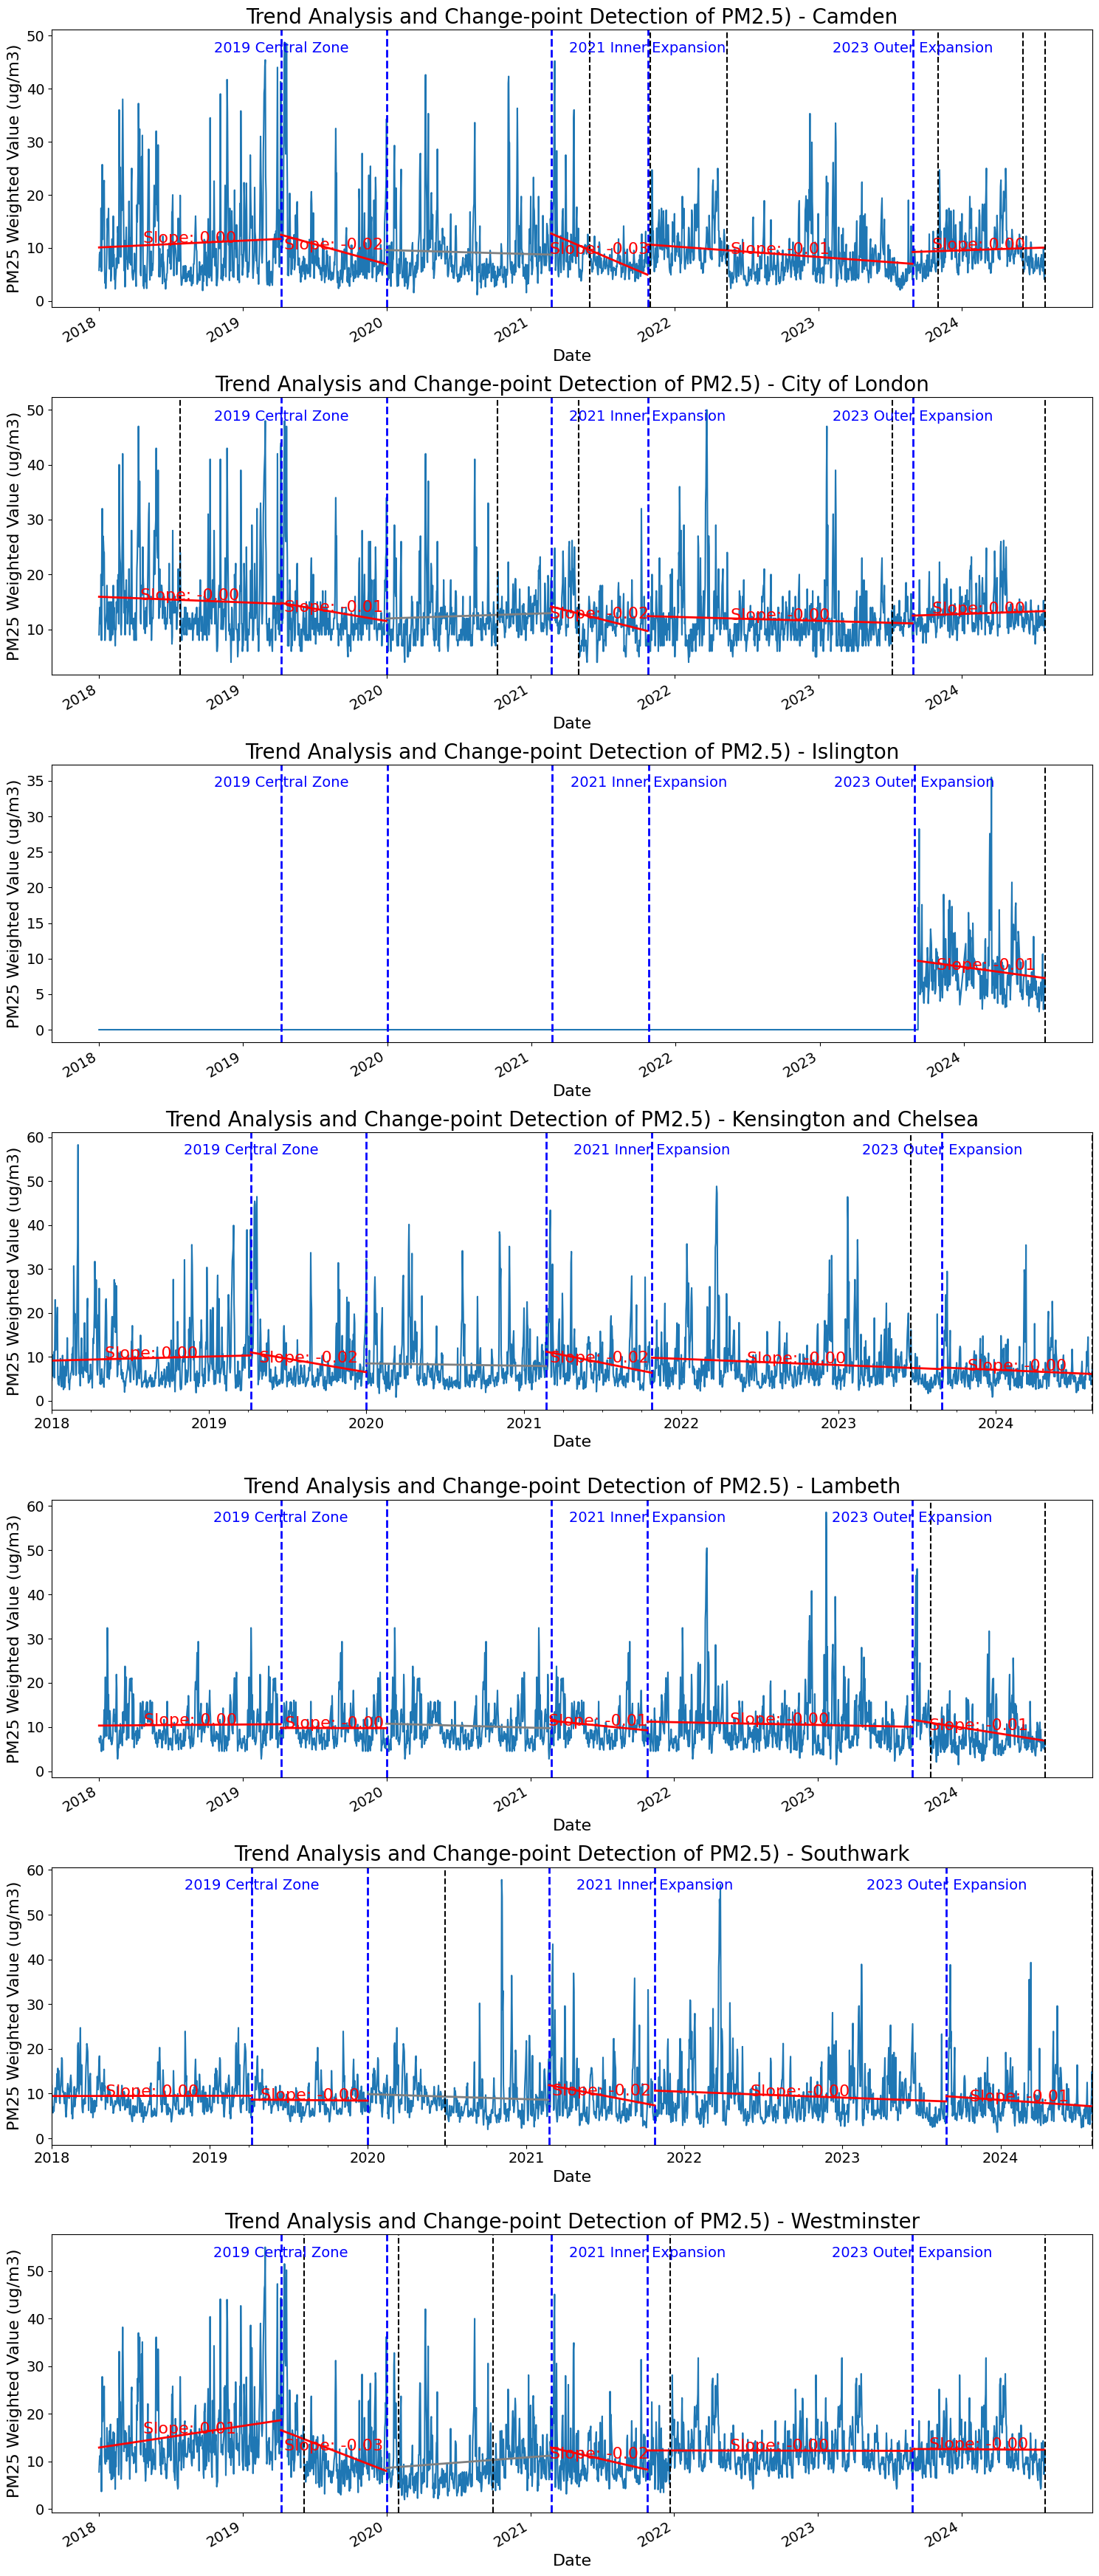

In [10]:
# Define ULEZ change dates
ulez_changes = {
    "2019 Central Zone": pd.to_datetime("2019-04-08"),
    "2020 Covid-19 Lockdown": pd.to_datetime("2020-01-01"),
    "2021 Lockdown release": pd.to_datetime("2021-02-22"),
    "2021 Inner Expansion": pd.to_datetime("2021-10-25"),
    "2023 Outer Expansion": pd.to_datetime("2023-08-29")
}

highlight_changes = ["2019 Central Zone", "2021 Inner Expansion", "2023 Outer Expansion"]

# Prepare figure
plt.figure(figsize=(15, 35))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    
    # Plot NO weighted values
    df['PM25_weighted_value(ug m-3)'].plot(label=name)

    # Plot ULEZ change dates as vertical dashed lines and add labels inside the plot
    for change_name, change_date in ulez_changes.items():
        plt.axvline(change_date, color='blue', linestyle='--', linewidth=2, label=f'ULEZ {change_name}')
        if change_name in highlight_changes:
            plt.text(change_date, df['PM25_weighted_value(ug m-3)'].max() * 0.95, change_name, color='blue', fontsize=14, ha='center', va='bottom')
        

    # Trend analysis with linear regression and annotations
    for period_start, period_end in zip([df.index.min()] + list(ulez_changes.values()), list(ulez_changes.values()) + [df.index.max()]):
        period_mask = (df.index >= period_start) & (df.index < period_end)
        period_data = df.loc[period_mask, 'PM25_weighted_value(ug m-3)']
        
        if len(period_data) > 1:  # Ensure there are enough points for regression
            slope, intercept, r_value, p_value, std_err = linregress(period_data.index.map(pd.Timestamp.toordinal), period_data)
            if period_start == pd.to_datetime("2020-01-01") and period_end == pd.to_datetime("2021-02-22"):
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='gray', linestyle='-', linewidth=2)
            else:
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='red', linestyle='-', linewidth=2)
                plt.text(period_data.index[len(period_data)//2], intercept + slope * period_data.index[len(period_data)//2].toordinal(), 
                        f"Slope: {slope:.2f}", color='red', fontsize=16, ha='center')

    # Change point detection using ruptures
    algo = rpt.Pelt(model="rbf").fit(df['PM25_weighted_value(ug m-3)'].values)
    result = algo.predict(pen=10)
    
    # Highlight change points
    for cp in result:
        plt.axvline(df.index[cp - 1], color='k', linestyle='--')
    
    # Set larger font sizes for axis labels and legend
    plt.title(f'Trend Analysis and Change-point Detection of PM2.5) - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('PM25 Weighted Value (ug/m3)', fontsize=16)
    
    # Increase the size of axis ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


#### plot

In [ ]:
# uk_annual_mean = 20
# who_daily_mean = 15
# who_annual_mean = 5

# plt.figure(figsize=(15, 50))

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df.set_index('Date', inplace=True)
#     df['PM25_weighted_value(ug m-3)'].plot(label=name)

#     # Add the three standard lines with text annotations
#     plt.axhline(y=uk_annual_mean, color='orange', linestyle='--', linewidth=2)
#     plt.text(df.index[0], uk_annual_mean, f'UK PM2.5 Annual Mean Objective ({uk_annual_mean} µg/m³)', color='orange', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_daily_mean, color='pink', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_daily_mean, f'WHO PM2.5 Daily Mean Guideline ({who_daily_mean} µg/m³)', color='pink', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_annual_mean, color='blue', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_annual_mean, f'WHO PM2.5 Annual Mean Guideline ({who_annual_mean} µg/m³)', color='blue', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.title(f'Time Series of PM25 Weighted Values - {name}', fontsize=20)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('PM2.5 Weighted Value (ug/m³)', fontsize=16)

# plt.tight_layout()
# plt.show()

In [ ]:
# # 绘制时间序列图
# plt.figure(figsize=(20, 70))

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df.set_index('Date', inplace=True)
#     df['PM25_weighted_value(ug m-3)'].plot(label=name)

#     plt.legend()
#     plt.title(f'Time Series of PM2.5 Weighted Values - {name}', fontsize=20)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('PM2.5 Weighted Value (ug/m3)', fontsize=16)

# plt.tight_layout()
# plt.show()


# PM10

In [11]:

def preprocess_data(df):
    df = df[(df['PM10_weighted_value(ug m-3)'] >= 0) & (df['PM10_weighted_value(ug m-3)'] <= 120)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\PM10_weighted"

# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-PM10_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-PM10_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-PM10_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-PM10_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-PM10_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-PM10_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-PM10_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'PM10_weighted_value(ug m-3)']]])
    summary_stats[name] = df['PM10_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
# print(summary_stats_df)


### hist & boxplot

In [ ]:

# # 可视化数据分布
# plt.figure(figsize=(20, 15))

# # # 直方图
# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     sns.histplot(df['PM10_weighted_value(ug m-3)'], kde=True)
#     plt.title(f'Histogram of PM10 Weighted Values - {name}', fontsize=20)
#     plt.ylabel('Frequency', fontsize=16)
#     if i == len(datasets):  # Only set x-label for the last subplot
#         plt.xlabel('PM10 Weighted Value (ug/m3)', fontsize=16)
#     else:
#         plt.xlabel('')  # Hide x-label for other subplots
# plt.tight_layout()
# plt.show()


In [ ]:
# # 可视化数据分布
# plt.figure(figsize=(15, 8))
# # 箱线图
# plt.subplot(2, 1, 2)
# sns.boxplot(x='Region', y='PM10_weighted_value(ug m-3)', data=combined_df, palette="Set2")
# plt.title('Boxplot of PM10 Weighted Values')
# plt.xlabel('Study Area')
# plt.ylabel('PM10 Weighted Value (ug/m3)')

# # plt.subplot(2, 1, 2)
# # sns.boxplot(data=[df['NO_weighted_value(ug m-3)'] for df in datasets.values()], palette="Set2")
# # plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())
# # plt.title('Boxplot of NO Weighted Values')
# # plt.xlabel('Study Area')
# # plt.ylabel('NO Weighted Value (ug/m3)')

# # plt.tight_layout()
# # plt.show()

## Time Series Analysis

#### ULEZ

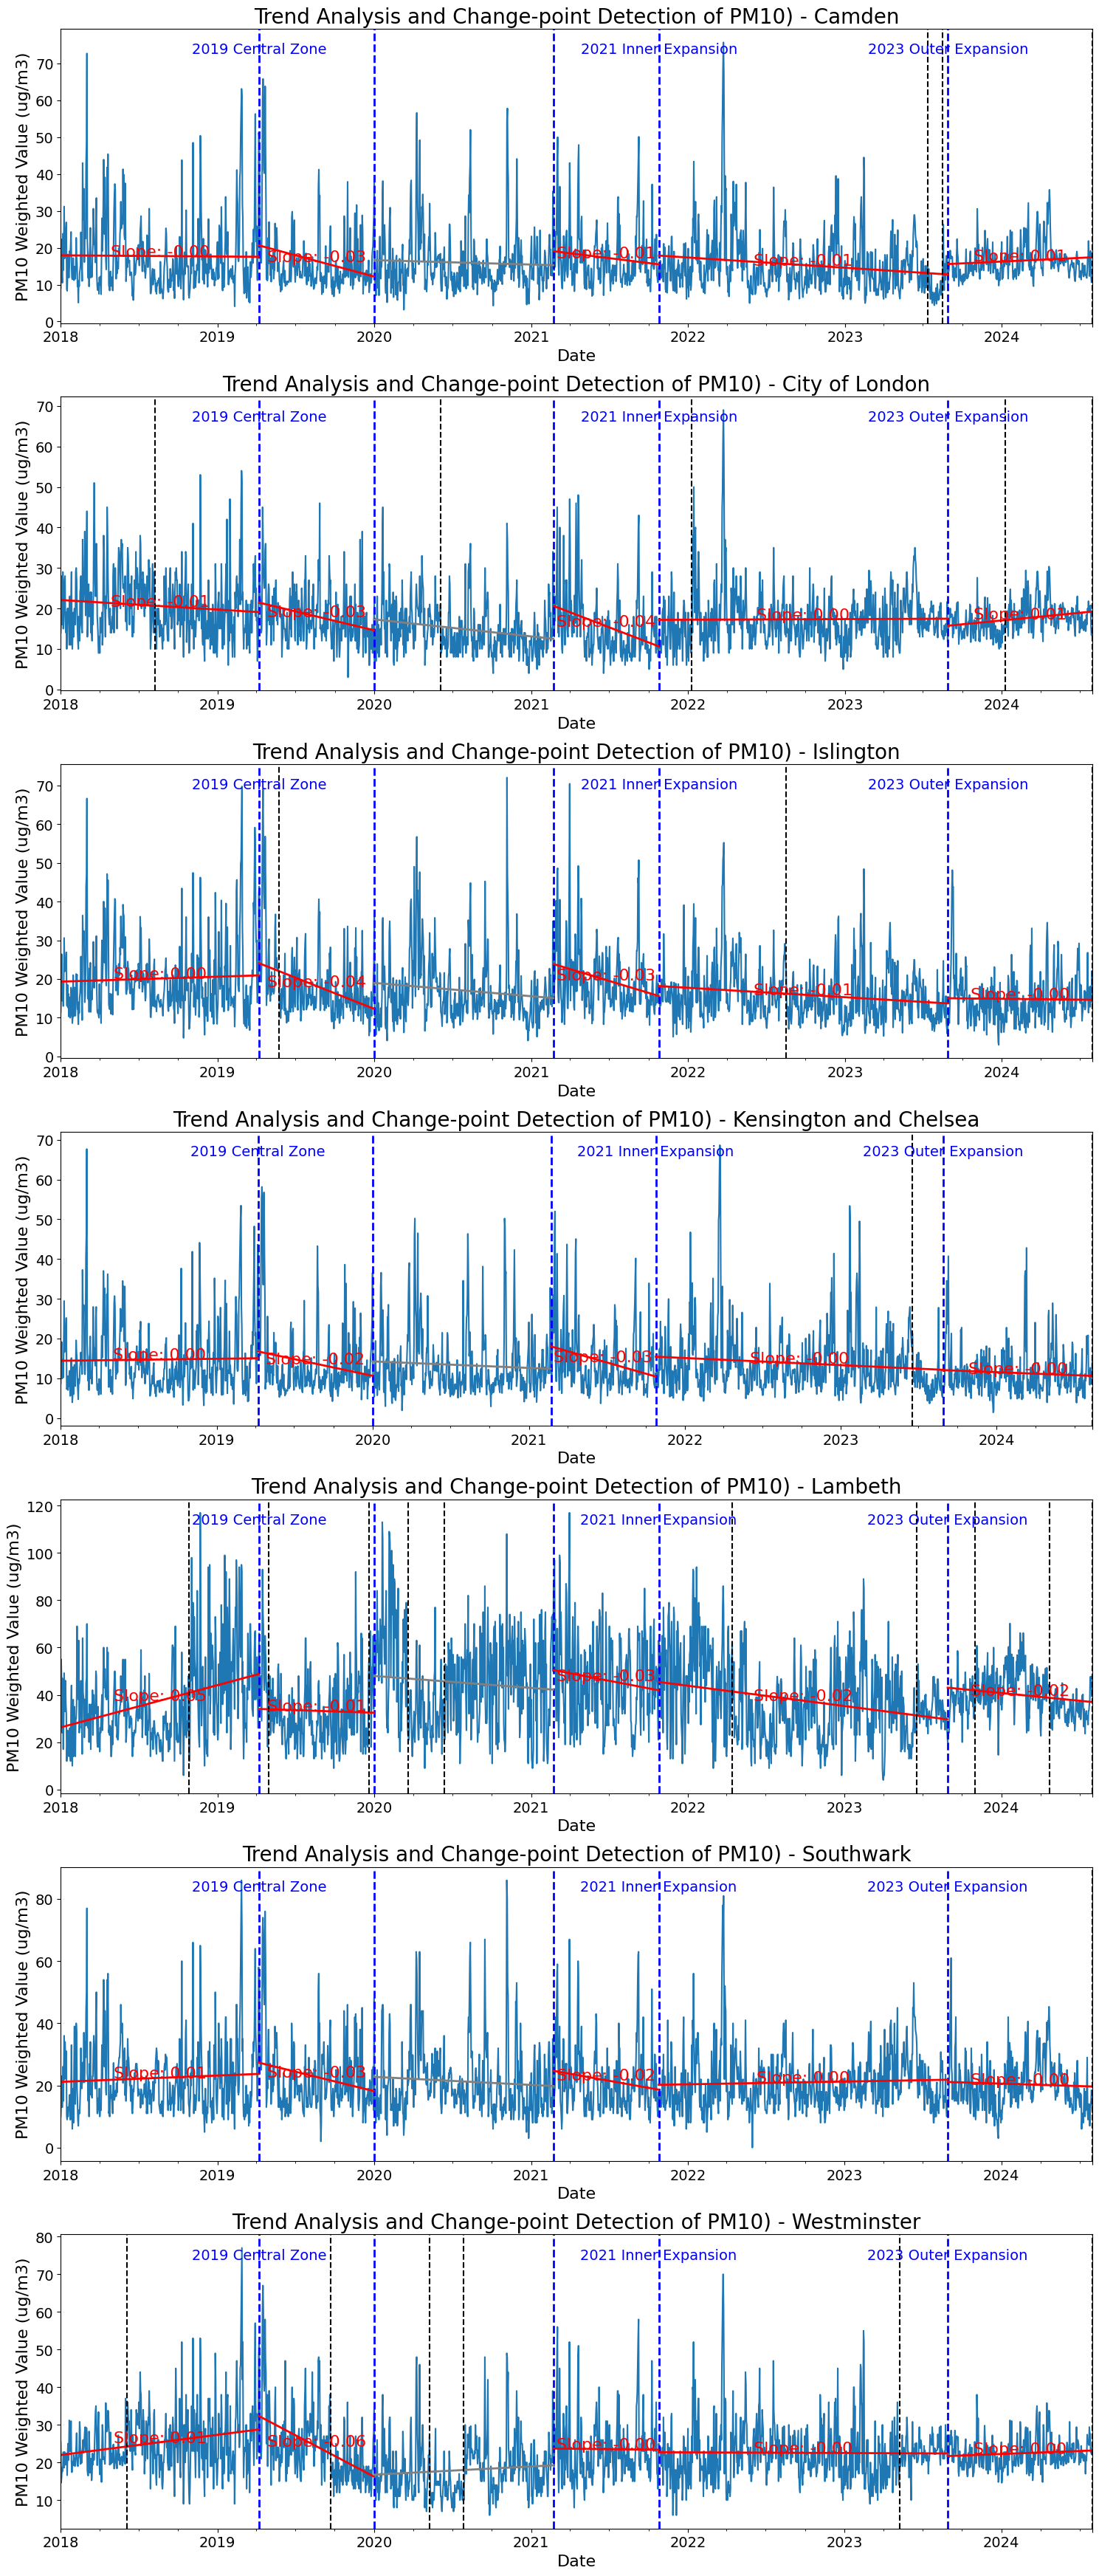

In [12]:
# Define ULEZ change dates
ulez_changes = {
    "2019 Central Zone": pd.to_datetime("2019-04-08"),
    "2020 Covid-19 Lockdown": pd.to_datetime("2020-01-01"),
    "2021 Lockdown release": pd.to_datetime("2021-02-22"),
    "2021 Inner Expansion": pd.to_datetime("2021-10-25"),
    "2023 Outer Expansion": pd.to_datetime("2023-08-29")
}

highlight_changes = ["2019 Central Zone", "2021 Inner Expansion", "2023 Outer Expansion"]

# Prepare figure
plt.figure(figsize=(15, 35))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    
    # Plot NO weighted values
    df['PM10_weighted_value(ug m-3)'].plot(label=name)

    # Plot ULEZ change dates as vertical dashed lines and add labels inside the plot
    for change_name, change_date in ulez_changes.items():
        plt.axvline(change_date, color='blue', linestyle='--', linewidth=2, label=f'ULEZ {change_name}')
        if change_name in highlight_changes:
            plt.text(change_date, df['PM10_weighted_value(ug m-3)'].max() * 0.95, change_name, color='blue', fontsize=14, ha='center', va='bottom')
        

    # Trend analysis with linear regression and annotations
    for period_start, period_end in zip([df.index.min()] + list(ulez_changes.values()), list(ulez_changes.values()) + [df.index.max()]):
        period_mask = (df.index >= period_start) & (df.index < period_end)
        period_data = df.loc[period_mask, 'PM10_weighted_value(ug m-3)']
        
        if len(period_data) > 1:  # Ensure there are enough points for regression
            slope, intercept, r_value, p_value, std_err = linregress(period_data.index.map(pd.Timestamp.toordinal), period_data)
            if period_start == pd.to_datetime("2020-01-01") and period_end == pd.to_datetime("2021-02-22"):
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='gray', linestyle='-', linewidth=2)
            else:
                plt.plot(period_data.index, intercept + slope * period_data.index.map(pd.Timestamp.toordinal), color='red', linestyle='-', linewidth=2)
                plt.text(period_data.index[len(period_data)//2], intercept + slope * period_data.index[len(period_data)//2].toordinal(), 
                        f"Slope: {slope:.2f}", color='red', fontsize=16, ha='center')

    # Change point detection using ruptures
    algo = rpt.Pelt(model="rbf").fit(df['PM10_weighted_value(ug m-3)'].values)
    result = algo.predict(pen=10)
    
    # Highlight change points
    for cp in result:
        plt.axvline(df.index[cp - 1], color='k', linestyle='--')
    
    # Set larger font sizes for axis labels and legend
    plt.title(f'Trend Analysis and Change-point Detection of PM10) - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('PM10 Weighted Value (ug/m3)', fontsize=16)
    
    # Increase the size of axis ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


#### plot

In [ ]:
# uk_annual_mean = 40
# who_daily_mean = 45
# who_annual_mean = 15

# plt.figure(figsize=(15, 50))

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#     df.set_index('Date', inplace=True)
#     df['PM10_weighted_value(ug m-3)'].plot(label=name)

#     # Add the three standard lines with text annotations
#     plt.axhline(y=uk_annual_mean, color='orange', linestyle='--', linewidth=2)
#     plt.text(df.index[0], uk_annual_mean, f'UK PM10 Annual Mean Objective ({uk_annual_mean} µg/m³)', color='orange', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_daily_mean, color='pink', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_daily_mean, f'WHO PM10 Daily Mean Guideline ({who_daily_mean} µg/m³)', color='pink', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.axhline(y=who_annual_mean, color='blue', linestyle='--', linewidth=2)
#     plt.text(df.index[0], who_annual_mean, f'WHO PM10 Annual Mean Guideline ({who_annual_mean} µg/m³)', color='blue', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

#     plt.title(f'Time Series of PM25 Weighted Values - {name}', fontsize=20)
#     plt.xlabel('Date', fontsize=16)
#     plt.ylabel('PM10 Weighted Value (ug/m³)', fontsize=16)

# plt.tight_layout()
# plt.show()